<a href="https://colab.research.google.com/github/dron1t/codelabfun/blob/main/IO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Report American census

Data is American census from 1994. Prediction task for this report is to determine whether a person makes over 50k a year or less. The [latest data](https://www.firstrepublic.com/insights-education/how-much-does-the-average-american-make) says that median american worker earns `$54,132`.  

The average income in 2020 according to Statista was `$71,456`.  
This can be calculates as aproximatly `234 572 PLN` before taxes. Average US tax wage is 27.2%, so net income is currently `181 042 PLN` (~15k PLN monthly). Taking into account inflation `$50,000` from December 1994 would be worth `$99,130.59` in December 2022.  


## Importing data

In [ ]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('drive/MyDrive/inf/io/census/adult.train.csv')
test_data = pd.read_csv('drive/MyDrive/inf/io/census/adult.test.csv')

data = pd.concat([train_data, test_data])

We are having 48842 records in our set.

In [ ]:
data

,age,workclass,fnlwgt,eduction,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


## Checking data

In [ ]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
eduction          0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
data.isin([' ?', '']).sum()

age                  0
workclass         2799
fnlwgt               0
eduction             0
education.num        0
marital.status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     857
income               0
dtype: int64

### Missing values in columns:
* workclass 2799
* occupation 2809
* native.country 857

Checking types of data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   eduction        48842 non-null  object
 4   education.num   48842 non-null  int64 
 5   marital.status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital.gain    48842 non-null  int64 
 11  capital.loss    48842 non-null  int64 
 12  hours.per.week  48842 non-null  int64 
 13  native.country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


Check duplicates

In [ ]:
data.duplicated().sum()

29

## Some cleanup before analysis

We've noticed that income has 2 values for each category `51K.` and `51K` without ending dot 

In [ ]:
data['income'] = data['income'].replace(' <=50K.', ' <=50K')
data['income'] = data['income'].replace(' >50K.', ' >50K')
data['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

## Analysis

Feature classes per sex

In [ ]:
categorical_features = data.select_dtypes(include=['object']).columns
categorical_features = categorical_features.drop(['sex'])
categorical_features

Index(['workclass', 'eduction', 'marital.status', 'occupation', 'relationship',
       'race', 'native.country', 'income'],
      dtype='object')

<ipython-input-9-9c12d2f713dc>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(5, 2, i+1)


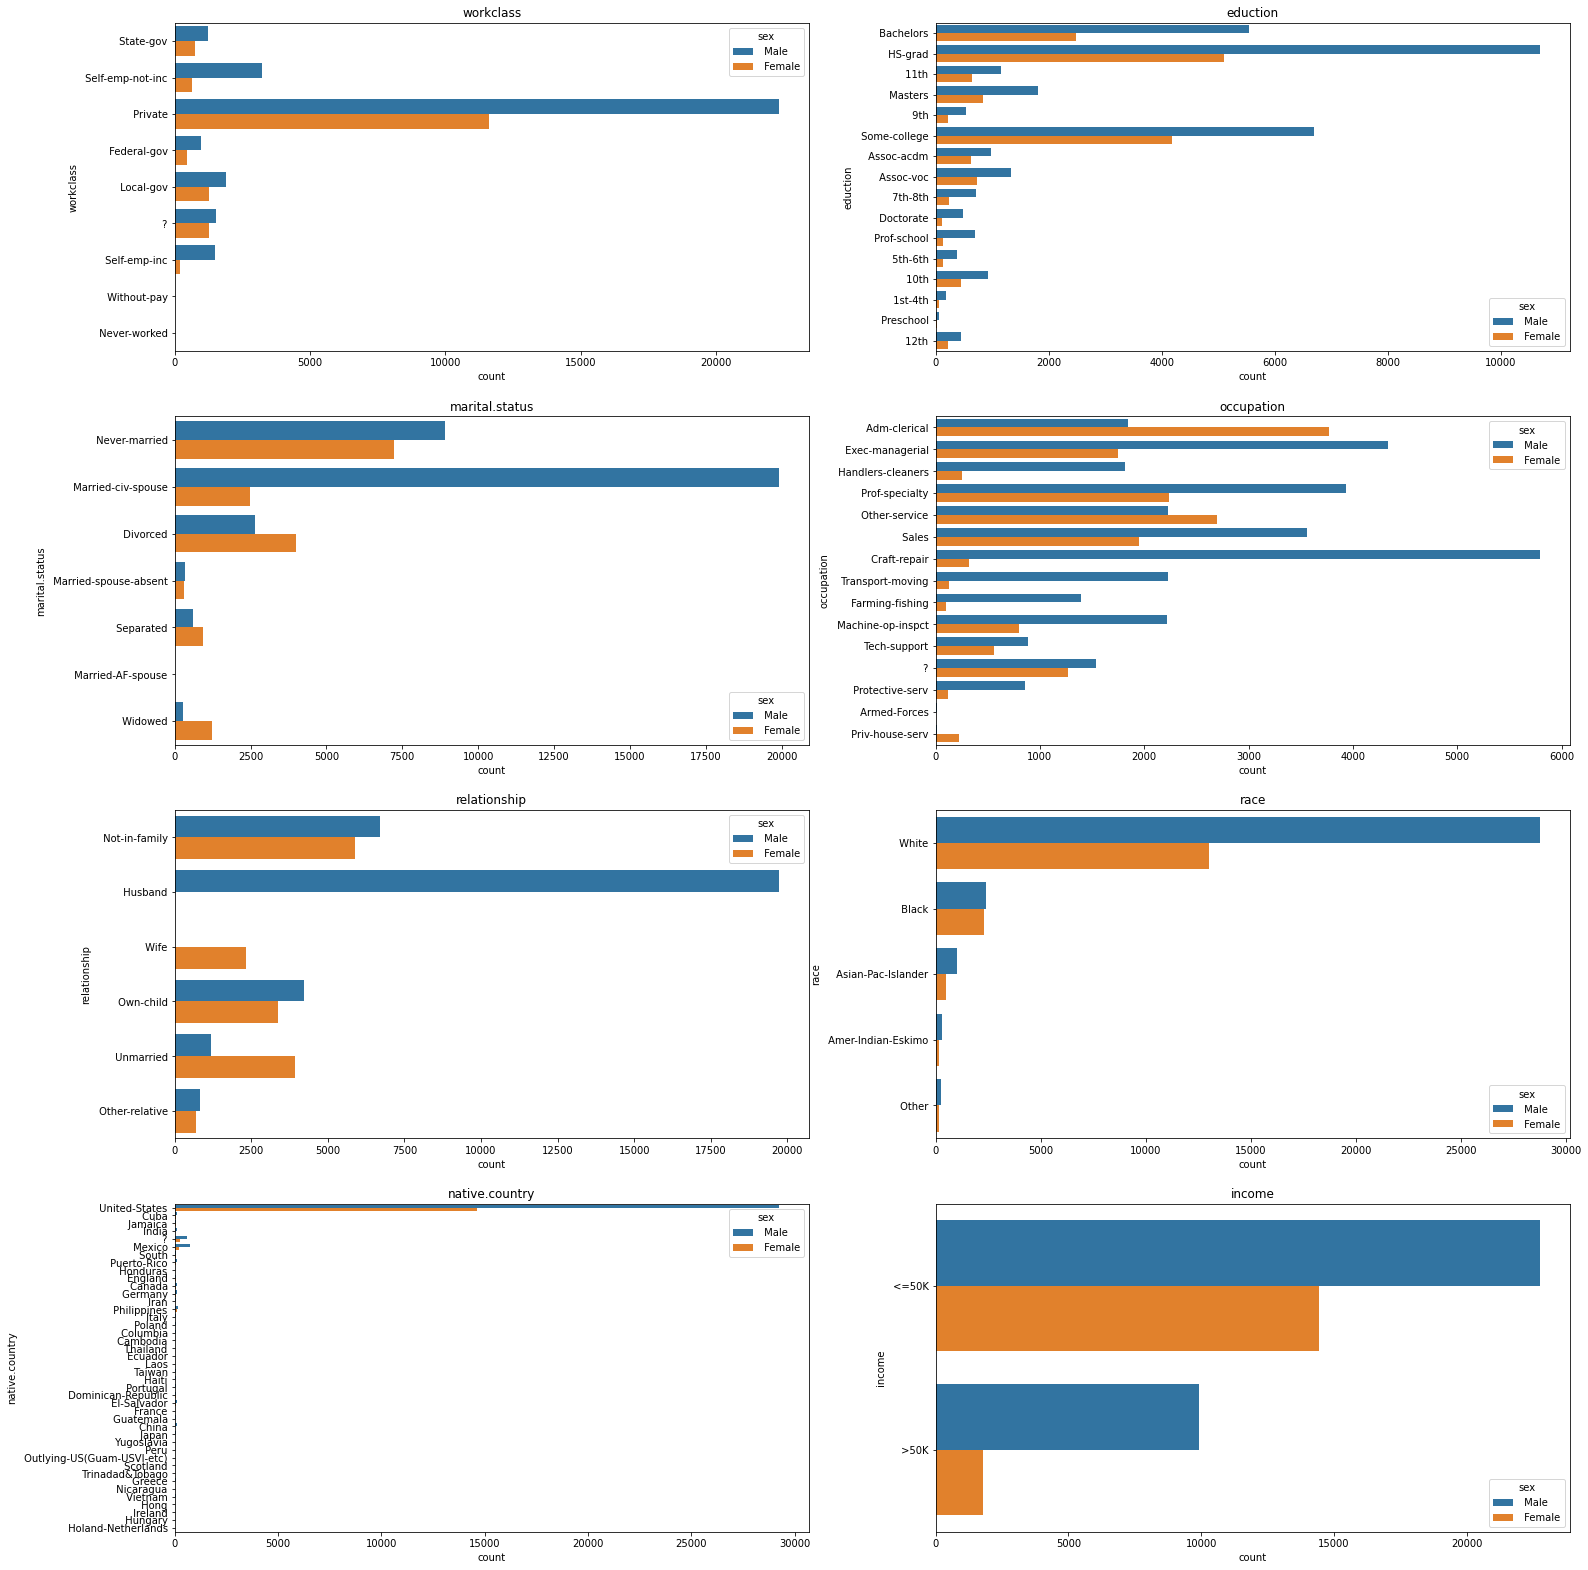

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25,35))
plt.subplot(521)
dt = data
i=0
for c in categorical_features:
    plt.subplot(5, 2, i+1)
    i += 1
    sns.countplot(y=c, data=dt, hue='sex')
    plt.title(c)

plt.show()

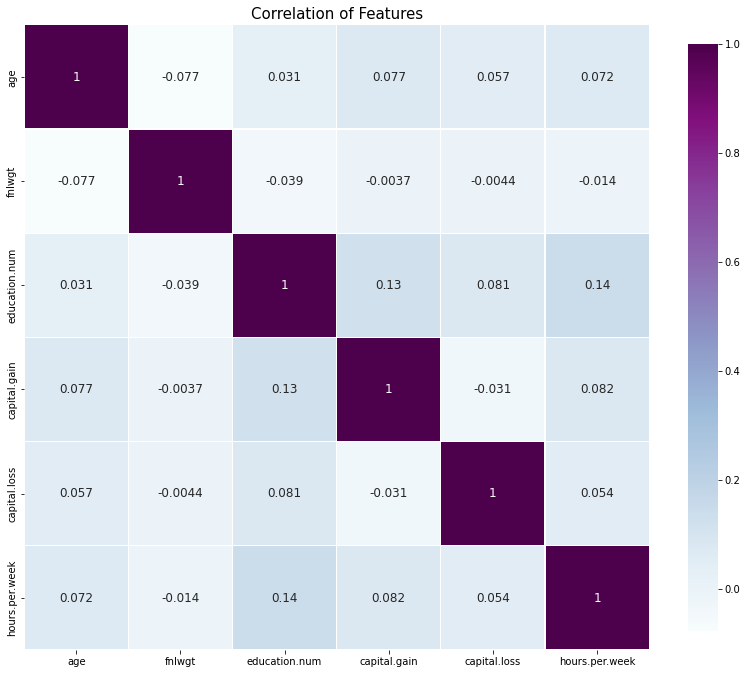

In [ ]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(150, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "BuPu",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Correlation of Features', y=1.05, size=15)

correlation_heatmap(data)

## Data preparation (pre-processing of data)

Drop duplicates

In [ ]:
data = data.drop_duplicates()

We have one binary value column: sex and multiple discreete value columns.

We are going to replace values in column sex with (0,1) values

We are creating a columns with names corresponding to values from discreet columns, so when option was chosen the value in corresponding column is set to 1 otherwise to 0

In [ ]:
binary_features = ['sex']
nominal_features = ['workclass'  ,'marital.status' , 'relationship' , 'race' ,'native.country' , 'occupation']



Drop education as it is already encoded

In [ ]:
data = data.drop('eduction', axis=1)

## Binning countries
As natice.country column has rare lalbels and fairly uncommon values it will be hard for algorithms to cut through the noise. Because of that we decided to group up togther all countries except United-States and Mexico. 

In [ ]:
data['native.country'].value_counts()

 United-States                 43792
 Mexico                          943
 ?                               856
 Philippines                     294
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Poland                           87
 Guatemala                        86
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Greece                           49
 Nicaragua                        49
 

In [ ]:
import numpy as np


data['native.country'] = np.where(data['native.country'].isin([' United-States', ' Mexico']),
                           data['native.country'].str.title(),
                           'Other')

data['native.country'].unique()

array([' United-States', 'Other', ' Mexico'], dtype=object)

In [ ]:
data['native.country'].unique()

array([' United-States', 'Other', ' Mexico'], dtype=object)

## Split data

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import export_text

(train_set, test_set) = train_test_split(data, train_size=0.3, random_state=163686)

train_classes = train_set['income']
train_set = train_set.drop(['income'], axis=1)
test_classes = test_set['income']
test_set = test_set.drop(['income'], axis=1)

train_set_columns = train_set.columns
test_set_columns = test_set.columns

## Impute missing values

We have few columns with some missing data. There are a few ways to deal with it by using imputation: [link](https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779) 
* Ignore it
* Use median
* Use the most fequent 
* Use constant value
* Use kNN algorithm
* Use Multivariate Imputation by Chained Equation (MICE)
* Use Deep Learning (Datawig)

We can't use median or mean as these values belong to categorical features. As that we are going to use: Simple imputer - most frequest as this the one that works with categorical features. 

In [ ]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer( strategy='most_frequent', missing_values=[' ?'])
imp_mean.fit(train_set)
imputed_train_set = imp_mean.transform(train_set)

imp_mean = SimpleImputer( strategy='most_frequent',  missing_values=[' ?'])
imp_mean.fit(test_set)
imputed_test_set = imp_mean.transform(test_set)

In [ ]:
'?' in imputed_train_set

False

In [ ]:
'?' in imputed_test_set

False

In [ ]:
test_set.columns.values

array(['age', 'workclass', 'fnlwgt', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country'], dtype=object)

In [ ]:
imputed_train_set

array([[47, ' Private', 159550, ..., 0, 40, ' United-States'],
       [41, ' Self-emp-not-inc', 29762, ..., 0, 70, ' United-States'],
       [50, ' State-gov', 198103, ..., 0, 40, ' United-States'],
       ...,
       [60, ' Private', 165441, ..., 0, 40, ' United-States'],
       [52, ' Private', 221936, ..., 0, 40, ' United-States'],
       [42, ' Private', 202466, ..., 0, 45, ' United-States']],
      dtype=object)

### Hot encoding
We are hot ecoding data using nominal_features which corresponds to categorical data within our dataset. 

"Categorical data are variables that contain label values rather than numeric values"[[1]](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/)[[2]](https://en.wikipedia.org/wiki/Nominal_category)

In [ ]:
test_set_he = pd.get_dummies(pd.DataFrame(imputed_test_set, columns=test_set.columns), columns=nominal_features)
train_set_he = pd.get_dummies(pd.DataFrame(imputed_train_set, columns=train_set.columns), columns=nominal_features)

## Compensation of missing column
As we did imputation we are missing some columns in test set compared to the train set. So we're going to add that to the test set. 

In [ ]:
import numpy as np
diff = np.setdiff1d(train_set_he.columns.values, test_set_he.columns.values)

In [ ]:
diff

array([], dtype=object)

In [ ]:
for column in diff:
  if column not in train_set_he.columns:
    train_set_he[column] = 0
  else:
    test_set_he[column] = 0

diff = np.setdiff1d(train_set_he.columns.values, test_set_he.columns.values)
diff

array([], dtype=object)

In [ ]:
train_set_he['sex'].unique()

array([' Female', ' Male'], dtype=object)

In [ ]:
train_set_he['sex'] = train_set_he['sex'].map({' Female': 1, ' Male': 0})
test_set_he['sex'] = test_set_he['sex'].map({' Female': 1, ' Male': 0})

train_set_he

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving
0,47,159550,9,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,41,29762,10,0,5013,0,70,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,50,198103,13,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,48,310639,10,0,0,0,50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,80145,9,0,0,0,60,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14632,68,191517,10,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14633,42,287244,9,0,0,0,55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14634,60,165441,4,1,0,0,40,0,0,0,...,0,0,1,0,0,0,0,0,0,0
14635,52,221936,9,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_set_scaled = scaler.fit_transform(train_set_he)
test_set_scaled = scaler.fit_transform(test_set_he)

In [ ]:
results = {}

# Decision Tree [[1]](https://medium.com/analytics-vidhya/classification-in-decision-tree-a-step-by-step-cart-classification-and-regression-tree-8e5f5228b11e)[[2]](https://scikit-learn.org/stable/modules/tree.html#tree)

Decision tree is supervised learning algorithm used for classification and regression. The goal is to create a model that can predict a target value based on vector of feature variables by using simple decision rules.
Sklearn is using CART algorithm. CART is using Gini Impurity for splitting nodes into sub-nodes. 

27564
80.70740491318479 %
[[22523  3446]
 [ 3143  5041]]


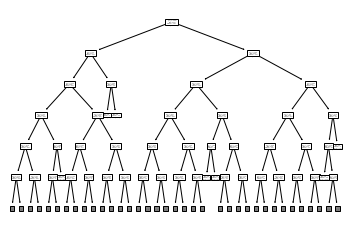

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import export_text

clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_set_scaled, train_classes.values)

tree.plot_tree(clf, max_depth=5)
# r = export_text(clf, feature_names=columns.values)
# print(r)
good_predictions = 0
len = test_set_scaled.shape[0]
test_classes_values = test_classes.values
res = clf.predict(test_set_scaled)
for i,r in enumerate(res):
    if r == test_classes_values[i]:
        good_predictions = good_predictions + 1
print(good_predictions)
print(good_predictions / len * 100, "%")

results["decison_tree"] = good_predictions / len
decision_tree_matrix = confusion_matrix(test_classes_values, res)
print(decision_tree_matrix)

In [ ]:
def generate_confusion_matrix_heat_map(matrix, title):
  ax = sns.heatmap(matrix, fmt='d', annot=True, cmap='Blues')
  ax.set_title(title)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values')

  ax.xaxis.set_ticklabels(['<=50k','>50k'])
  ax.yaxis.set_ticklabels(['<=50k','>50k'])
  plt.show()

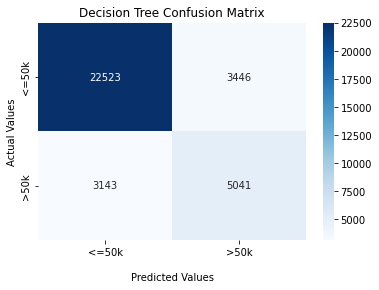

In [ ]:
generate_confusion_matrix_heat_map(decision_tree_matrix, 'Decision Tree Confusion Matrix')

# kNN [[1]](https://pl.wikipedia.org/wiki/K_najbli%C5%BCszych_s%C4%85siad%C3%B3w) [[2]](https://www.ibm.com/topics/knn)
The k-nearest neighbors algorithm is a supervised learning classifier which uses the proximity to make grouping of the point in order to do classification or prediction. The short explaination of it:
1. Observation C having vector of X variables is compared to other observations - for example by euclidean distance.
2. Assing k closest observations to C.
3. Calculate the average of the prediction point. 

One of the most important things is to chose K which strongly influences the outcome of the training. 



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

Changing the income values to numeric

In [ ]:
# test_classes['income'] = test_classes['income'].map({' <=50K': 0, ' >50K': 1})
# train_classes['income'] = test_classes['income'].map({' <=50K': 0, ' >50K': 1})

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9) ###k=9
knn = knn.fit(train_set_scaled, train_classes.values)

In [ ]:
pred = knn.predict(test_set_scaled)

knn_matrix = confusion_matrix(test_classes.values, pred)
knn_report = classification_report(test_classes.values, pred)
print(knn_report)

              precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89     25969
        >50K       0.66      0.56      0.61      8184

    accuracy                           0.83     34153
   macro avg       0.77      0.74      0.75     34153
weighted avg       0.82      0.83      0.82     34153



In [ ]:
knn_report2 = classification_report(test_classes.values, pred, output_dict=True)

results['knn'] = knn_report2['accuracy']

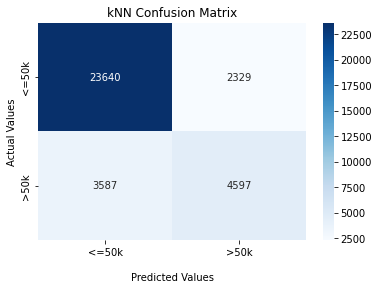

In [ ]:
generate_confusion_matrix_heat_map(knn_matrix, 'kNN Confusion Matrix')

# Naive Bayes
Naive Bayes are a family of classifiers that apply Bayes' theorem. It is simple probablistic classificator. They are based on theory about independence of predictors. 

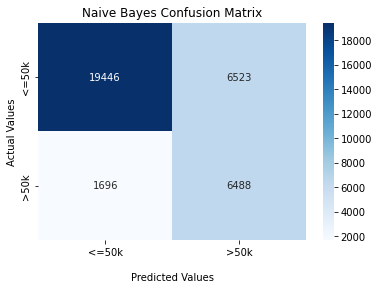

In [ ]:
from sklearn.naive_bayes import BernoulliNB

gnb = BernoulliNB()

gnb.fit(train_set_scaled, train_classes.values)

pred = gnb.predict(test_set_scaled)

naive_bayes_matrix = confusion_matrix(test_classes.values, pred)
classification_report(test_classes.values, pred)

generate_confusion_matrix_heat_map(naive_bayes_matrix, 'Naive Bayes Confusion Matrix')

In [ ]:
bayes_report2 = classification_report(test_classes.values, pred, output_dict=True)

results['bayes'] = bayes_report2['accuracy']

In [ ]:
report = classification_report(test_classes.values, pred)
print(report)

              precision    recall  f1-score   support

       <=50K       0.92      0.75      0.83     25969
        >50K       0.50      0.79      0.61      8184

    accuracy                           0.76     34153
   macro avg       0.71      0.77      0.72     34153
weighted avg       0.82      0.76      0.77     34153



In [ ]:
print('Training set score: {:.4f}'.format(gnb.score(train_set_scaled, train_classes.values)))

print('Test set score: {:.4f}'.format(gnb.score(test_set_scaled, test_classes.values)))

Training set score: 0.7642
Test set score: 0.7593


# Neural Networks
Neural netowkrs are subset of machine learning algorithms that mimick human brain. They are comprised of a node layers, containing an input, output and one or more hidden layers. 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
train_set_scaled.shape

(14637, 50)

Getting the dimension for first input layer

In [ ]:
(rows, in_dim) = train_set_scaled.shape

### Neural Network 1 (50-20-20-1)

Input layer: 50
Hidden layers: 
* 20, activation: relu
* 20, activation: relu  
Output layer, activation: sigmoid  
5 epochs, 16 in batch

In [ ]:
model = Sequential()
model.add(Dense(8, input_dim=in_dim, activation='relu', name='input_layer'))

model.add(Dense(20, activation='relu', name='layer1'))

model.add(Dense(20, activation='relu', name='layer2'))

model.add(Dense(1, activation='sigmoid', name='output-layer'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

Changing classes from string to int. 

In [ ]:
def change_classes_to_int(dataset):
  return dataset.map({' <=50K':0, ' >50K': 1})

In [ ]:
train_classes_val = change_classes_to_int(train_classes)
test_classes_val = change_classes_to_int(test_classes)

In [ ]:
print(train_classes_val.value_counts())
print(test_classes_val.value_counts())

0    11140
1     3497
Name: income, dtype: int64
0    25969
1     8184
Name: income, dtype: int64


Defining the Keras TensorBoard callback

In [ ]:
%load_ext tensorboard

In [ ]:
import datetime
import keras

logdir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "lukaszke"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

Training model function  
We are setting up class_weight parameter, so observations with 50k+ result have are 3 times more important as the training is unbalanced. There are 3 times more records with income of 50k and less. 

In [ ]:
from tensorflow.python import train
from keras.callbacks import ModelCheckpoint

NB_EPOCHS = 5  # num of epochs to test for
BATCH_SIZE = 16

def run_nn(model, train_set_scaled, train_classes_val, epochs, batch_size, name, checkpoint):
  logdir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + name
  tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

  history = model.fit(train_set_scaled,
                      train_classes_val.values,
                      validation_data=(test_set_scaled, test_classes_val.values),
                      epochs=epochs,
                      batch_size=batch_size,
                      verbose=1, callbacks=[tensorboard_callback, checkpoint], class_weight={0: 1, 1: 3})
  return history

Calling function to train the model

In [ ]:
import tensorflow as tf

checkpoint_filepath1 = '/tmp/checkpoint'
model_checkpoint_callback1 = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath1,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
history = run_nn(model, train_set_scaled, train_classes_val, 5, 16, '50-20-20-1relu-relu-sigmoid', model_checkpoint_callback1)

Epoch 1/5
915/915 [==============================] - 8s 8ms/step - loss: 0.7329 - accuracy: 0.7430 - val_loss: 0.4089 - val_accuracy: 0.7924
Epoch 2/5
915/915 [==============================] - 4s 5ms/step - loss: 0.5872 - accuracy: 0.7975 - val_loss: 0.3816 - val_accuracy: 0.8087
Epoch 3/5
915/915 [==============================] - 4s 5ms/step - loss: 0.5662 - accuracy: 0.8073 - val_loss: 0.3646 - val_accuracy: 0.8160
Epoch 4/5
915/915 [==============================] - 4s 5ms/step - loss: 0.5577 - accuracy: 0.8094 - val_loss: 0.3687 - val_accuracy: 0.8165
Epoch 5/5
915/915 [==============================] - 4s 4ms/step - loss: 0.5521 - accuracy: 0.8137 - val_loss: 0.3807 - val_accuracy: 0.8026


##### Accuracy Score Function

Accuracy score - changing the values produced by sigmoid function to ones and zeros. 

In [ ]:
from sklearn.metrics import accuracy_score
def accuracy_score_fn(model, test_set_scaled_arg, tst_classes):
  y_predict = model.predict(test_set_scaled_arg)
  y_pred_bin = np.where(y_predict >0.5, 1, 0)
  x = accuracy_score(tst_classes.values, y_pred_bin)
  return (x, y_pred_bin) 

Loading weights of the best Epoch

In [ ]:
model.load_weights(checkpoint_filepath1)
model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

Running test

In [ ]:
(accuracy_result, y_predict_1) = accuracy_score_fn(model, test_set_scaled, test_classes_val)
print(accuracy_result)

1068/1068 [==============================] - 1s 1ms/step
0.816472930635669


**Confusion Matrix**

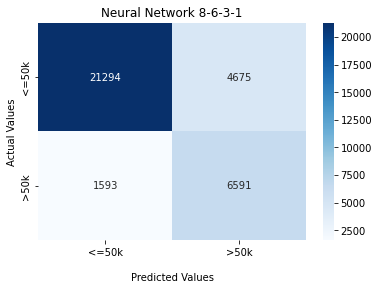

In [ ]:
nn1_report = classification_report(test_classes_val.values, y_predict_1, output_dict=True)
nn1_matrix = confusion_matrix(test_classes_val.values, y_predict_1)
nn_report =  [accuracy_result]
generate_confusion_matrix_heat_map(nn1_matrix, 'Neural Network 8-6-3-1')

**Loss** vs **Value Loss**

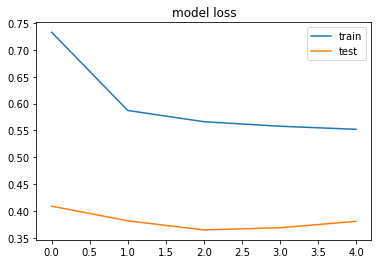

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('model loss')
plt.legend()

Saving graph vizualization

In [ ]:
!pip3 install ann_visualizer
!pip3 install graphviz

from ann_visualizer.visualize import ann_viz

ann_viz(model, view=True, title="1st", filename="1.nn")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=d609f5bfc7d7723a164587ec9a4a1e589e9bf16efac1ed7d17520f1cf1526360
  Stored in directory: /root/.cache/pip/wheels/4b/ef/77/9b8c4ae2f9a11de19957b80bc5c684accd99114bb8dc6b374c
Successfully built ann_visualizer
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Neural Netwok 2 (50-128-64-1)


*Network* 50-128-64-1  
Epochs: 50  
Batch size: 500



In [ ]:
import tensorflow as tf

METRICS = [
  tf.keras.metrics.BinaryAccuracy(name='accuracy'),
]

model2 = Sequential()
model2.add(Dense(50, input_dim=in_dim, activation='relu', name='input_layer'))

model2.add(Dense(128, activation='relu', name='layer1'))

model2.add(Dense(64, activation='relu', name='layer2'))

model2.add(Dense(1, activation='sigmoid', name='output-layer'))

model2.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=METRICS)

In [ ]:
checkpoint_filepath2 = '/tmp/checkpoint2'
model_checkpoint_callback2 = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath2,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
history2 = run_nn(model2, train_set_scaled, train_classes_val, 50, 500, '50-128-64-1', model_checkpoint_callback2)

Epoch 1/50
30/30 [==============================] - 2s 31ms/step - loss: 0.8008 - accuracy: 0.7270 - val_loss: 0.4759 - val_accuracy: 0.7518
Epoch 2/50
30/30 [==============================] - 0s 13ms/step - loss: 0.6131 - accuracy: 0.7851 - val_loss: 0.3841 - val_accuracy: 0.8090
Epoch 3/50
30/30 [==============================] - 1s 17ms/step - loss: 0.5804 - accuracy: 0.7988 - val_loss: 0.4004 - val_accuracy: 0.8002
Epoch 4/50
30/30 [==============================] - 1s 20ms/step - loss: 0.5646 - accuracy: 0.8030 - val_loss: 0.3830 - val_accuracy: 0.8089
Epoch 5/50
30/30 [==============================] - 1s 18ms/step - loss: 0.5551 - accuracy: 0.8082 - val_loss: 0.3804 - val_accuracy: 0.8101
Epoch 6/50
30/30 [==============================] - 1s 18ms/step - loss: 0.5443 - accuracy: 0.8106 - val_loss: 0.3825 - val_accuracy: 0.8085
Epoch 7/50
30/30 [==============================] - 0s 12ms/step - loss: 0.5376 - accuracy: 0.8148 - val_loss: 0.3716 - val_accuracy: 0.8160
Epoch 8/50
30

In [ ]:
model2.load_weights(checkpoint_filepath2)
model2.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
(accuracy_result2, y_predict_2) = accuracy_score_fn(model2, test_set_scaled, test_classes_val)

1068/1068 [==============================] - 2s 2ms/step


In [ ]:
print(accuracy_result2)

0.822475331596053


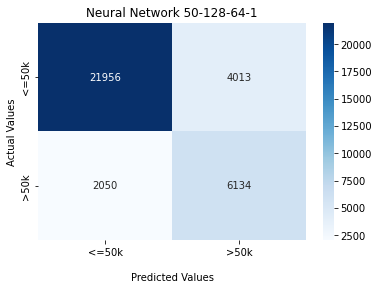

In [ ]:
nn2_report = classification_report(test_classes_val.values, y_predict_2, output_dict=True)
nn2_matrix = confusion_matrix(test_classes_val.values, y_predict_2)
nn_report.append(nn2_report['accuracy'])
generate_confusion_matrix_heat_map(nn2_matrix, 'Neural Network 50-128-64-1')

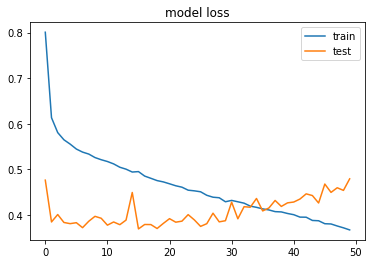

In [ ]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.title('model loss')
plt.legend()

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 50)                2550      
                                                                 
 layer1 (Dense)              (None, 128)               6528      
                                                                 
 layer2 (Dense)              (None, 64)                8256      
                                                                 
 output-layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 17,399
Trainable params: 17,399
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ann_viz(model2, view=True, title="2nd", filename="2.nn")

## Neural Netwok 3 (50-128-64-32-16-1) *


*Network* 50-128-64-1  
Epochs: 200  
Batch size: 500



In [ ]:
import tensorflow as tf

METRICS = [
  tf.keras.metrics.TruePositives(name='tp'),
  tf.keras.metrics.FalsePositives(name='fp'),
  tf.keras.metrics.TrueNegatives(name='tn'),
  tf.keras.metrics.FalseNegatives(name='fn'), 
  tf.keras.metrics.BinaryAccuracy(name='accuracy'),
  tf.keras.metrics.Precision(name='precision'),
  tf.keras.metrics.Recall(name='recall'),
  tf.keras.metrics.AUC(name='auc'),
]

model3 = Sequential()
model3.add(Dense(50, input_dim=in_dim, activation='relu', name='input_layer'))

model3.add(Dense(128, activation='relu', name='layer1'))

model3.add(Dense(64, activation='relu', name='layer2'))
model3.add(Dense(32, activation='tanh', name='layer3'))
model3.add(Dense(16, activation='selu', name='layer4'))
model3.add(Dense(1, activation='sigmoid', name='output-layer'))

model3.compile(loss='binary_crossentropy', 
              optimizer='ftrl',
              metrics=METRICS)

In [ ]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler
from keras import regularizers
import tensorflow as tf

In [ ]:
checkpoint_filepath3 = '/tmp/checkpoint3'
model_checkpoint_callback3 = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath3,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
epochs = 100
batch_size = 500

name2 = "neural_with_additonal3"
logdir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + name2
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

history3 = model3.fit(train_set_scaled,
                    train_classes_val.values,
                    validation_data=(test_set_scaled, test_classes_val.values),
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=1, callbacks=[tensorboard_callback, model_checkpoint_callback3], class_weight={0: 1, 1: 3})

Epoch 1/100
30/30 [==============================] - 6s 95ms/step - loss: 1.0266 - tp: 371.0000 - fp: 1239.0000 - tn: 9901.0000 - fn: 3126.0000 - accuracy: 0.7018 - precision: 0.2304 - recall: 0.1061 - auc: 0.4974 - val_loss: 0.6928 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 25969.0000 - val_fn: 8184.0000 - val_accuracy: 0.7604 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 2/100
30/30 [==============================] - 1s 36ms/step - loss: 1.0243 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 11140.0000 - fn: 3497.0000 - accuracy: 0.7611 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5000 - val_loss: 0.6925 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 25969.0000 - val_fn: 8184.0000 - val_accuracy: 0.7604 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 3/100
30/30 [==============================] - 1s 37ms/step - loss: 1.0243 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 11140.0000 - fn: 3497.0000 - accuracy: 0.7611 -

In [ ]:
model3.load_weights(checkpoint_filepath3)
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
(accuracy_result3, y_predict_3) = accuracy_score_fn(model3, test_set_scaled, test_classes_val)

1068/1068 [==============================] - 2s 1ms/step


In [ ]:
print(accuracy_result3)

0.7603724416595906


This is the worst neural network configuration which basically immedietly stops and puts every record in under 50k income. 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


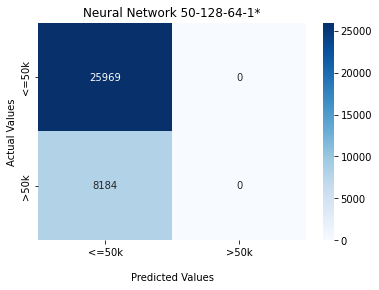

In [ ]:
nn3_report = classification_report(test_classes_val.values, y_predict_3, output_dict=True)
nn3_matrix = confusion_matrix(test_classes_val.values, y_predict_3)
nn_report.append(nn3_report['accuracy'])
generate_confusion_matrix_heat_map(nn3_matrix, 'Neural Network 50-128-64-1*')

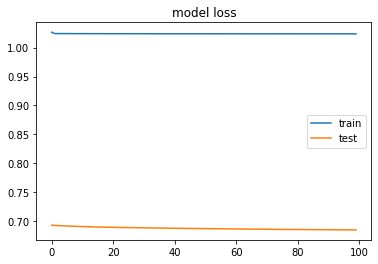

In [ ]:
plt.plot(history3.history['loss'], label='train')
plt.plot(history3.history['val_loss'], label='test')
plt.title('model loss')
plt.legend()

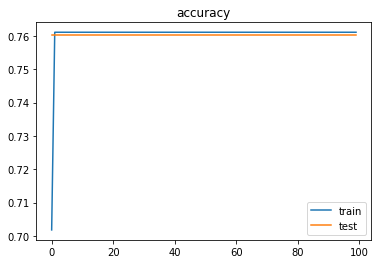

In [ ]:
plt.plot(history3.history['accuracy'], label='train')
plt.plot(history3.history['val_accuracy'], label='test')
plt.title('accuracy')
plt.legend()

In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 50)                2550      
                                                                 
 layer1 (Dense)              (None, 128)               6528      
                                                                 
 layer2 (Dense)              (None, 64)                8256      
                                                                 
 layer3 (Dense)              (None, 32)                2080      
                                                                 
 layer4 (Dense)              (None, 16)                528       
                                                                 
 output-layer (Dense)        (None, 1)                 17        
                                                                 
Total params: 19,959
Trainable params: 19,959
Non-trai

In [ ]:
ann_viz(model3, view=True, title="3rd", filename="3.nn")

## Neural Netwok 4 (50-128-256-128-64-32-1) *


*Network* 50-128-256-128-64-32-1 with 3 dropout layers
Epochs: 100  
Batch size: 500



In [ ]:
from keras.layers.regularization.dropout import Dropout
import tensorflow as tf

METRICS = [
  tf.keras.metrics.BinaryAccuracy(name='accuracy'),
]

model4 = Sequential()
model4.add(Dense(50, input_dim=in_dim, activation='relu', name='input_layer'))

model4.add(Dense(128, activation='relu', name='layer1'))
model4.add(Dense(256, activation='relu', name='layer2'))
model4.add(Dropout(rate=0.2))
model4.add(Dense(128, activation='relu', name='layer3'))
model4.add(Dropout(rate=0.5))
model4.add(Dense(64, activation='relu', name='layer4'))
model4.add(Dropout(rate=0.5))
model4.add(Dense(32, activation='relu', name='layer5'))
model4.add(Dropout(rate=0.5))
model4.add(Dense(1, activation='sigmoid', name='output-layer'))

model4.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=METRICS)

In [ ]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler
from keras import regularizers
import tensorflow as tf

def scheduler(epoch, lr):
  if epoch < 50:
    return lr
  else:
    return lr * tf.math.exp(-0.1)


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.005)

scheduler = LearningRateScheduler(scheduler)

In [ ]:
checkpoint_filepath4 = '/tmp/checkpoint4'
model_checkpoint_callback4 = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath4,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
epochs = 100
batch_size = 500

name2 = "neural_with_additonal_4"
logdir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + name2
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

history4 = model4.fit(train_set_scaled,
                    train_classes_val.values,
                    validation_data=(test_set_scaled, test_classes_val.values),
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=1, callbacks=[tensorboard_callback, model_checkpoint_callback4, reduce_lr], class_weight={0: 1, 1: 3})

Epoch 1/100
30/30 [==============================] - 2s 32ms/step - loss: 0.9542 - accuracy: 0.6095 - val_loss: 0.4719 - val_accuracy: 0.7562 - lr: 0.0010
Epoch 2/100
30/30 [==============================] - 1s 26ms/step - loss: 0.7240 - accuracy: 0.7633 - val_loss: 0.4215 - val_accuracy: 0.7771 - lr: 0.0010
Epoch 3/100
30/30 [==============================] - 1s 26ms/step - loss: 0.6485 - accuracy: 0.7859 - val_loss: 0.4061 - val_accuracy: 0.7812 - lr: 0.0010
Epoch 4/100
30/30 [==============================] - 1s 26ms/step - loss: 0.6178 - accuracy: 0.7909 - val_loss: 0.3845 - val_accuracy: 0.7892 - lr: 0.0010
Epoch 5/100
30/30 [==============================] - 1s 25ms/step - loss: 0.6031 - accuracy: 0.7943 - val_loss: 0.3851 - val_accuracy: 0.7950 - lr: 0.0010
Epoch 6/100
30/30 [==============================] - 1s 24ms/step - loss: 0.5872 - accuracy: 0.7966 - val_loss: 0.3756 - val_accuracy: 0.7967 - lr: 0.0010
Epoch 7/100
30/30 [==============================] - 1s 23ms/step - lo

In [ ]:
model4.load_weights(checkpoint_filepath4)
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
(accuracy_result4_from_checkpoint, y_predict4_from_checkpoint) = accuracy_score_fn(model4, test_set_scaled, test_classes_val)

1068/1068 [==============================] - 2s 2ms/step


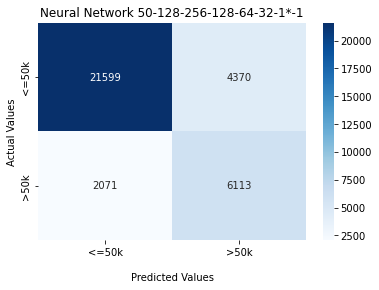

In [ ]:
nn4_report = classification_report(test_classes_val.values, y_predict4_from_checkpoint, output_dict=True)
nn4_matrix = confusion_matrix(test_classes_val.values, y_predict4_from_checkpoint)
nn_report.append(nn4_report['accuracy'])
generate_confusion_matrix_heat_map(nn4_matrix, 'Neural Network 50-128-256-128-64-32-1*-1')

In [ ]:
print(accuracy_result4_from_checkpoint)

0.8114074898251984


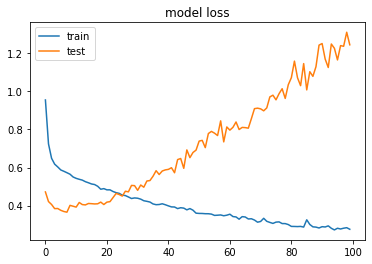

In [ ]:
plt.plot(history4.history['loss'], label='train')
plt.plot(history4.history['val_loss'], label='test')
plt.title('model loss')
plt.legend()

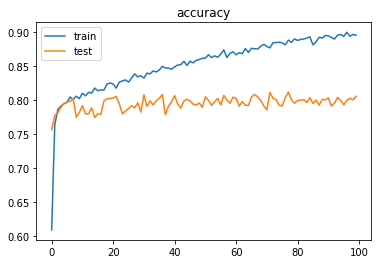

In [ ]:
plt.plot(history4.history['accuracy'], label='train')
plt.plot(history4.history['val_accuracy'], label='test')
plt.title('accuracy')
plt.legend()

In [ ]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 50)                2550      
                                                                 
 layer1 (Dense)              (None, 128)               6528      
                                                                 
 layer2 (Dense)              (None, 256)               33024     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 layer3 (Dense)              (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 layer4 (Dense)              (None, 64)               

In [ ]:
ann_viz(model4, view=True, title="4th", filename="4.nn")

In [ ]:
nn_report

[0.816472930635669, 0.822475331596053, 0.7603724416595906, 0.8114074898251984]

## Neural Network 5 (50-128-61-1)  
with 2 Dropout layers with rate=0.2
and with **Nadam** optimizer.

This produces the best results.

In [ ]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.01)

In [ ]:
model5 = Sequential()
model5.add(Dense(50, input_dim=in_dim, activation='relu', name='input_layer'))

model5.add(Dense(128, activation='relu', name='layer1'))
model5.add(Dropout(rate=0.2))
model5.add(Dense(64, activation='relu', name='layer2'))
model5.add(Dropout(rate=0.2))
model5.add(Dense(1, activation='sigmoid', name='output-layer'))

model5.compile(loss='binary_crossentropy', 
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
import tensorflow as tf

checkpoint_filepath5 = '/tmp/checkpoint11'
model_checkpoint_callback5 = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath5,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


In [ ]:
history5 = run_nn(model5, train_set_scaled, train_classes_val, 100, 500, '50-128-64-1', model_checkpoint_callback5)

Epoch 1/100
30/30 [==============================] - 2s 26ms/step - loss: 0.6944 - accuracy: 0.7661 - val_loss: 0.4812 - val_accuracy: 0.7588
Epoch 2/100
30/30 [==============================] - 1s 20ms/step - loss: 0.5722 - accuracy: 0.8015 - val_loss: 0.3691 - val_accuracy: 0.8156
Epoch 3/100
30/30 [==============================] - 0s 14ms/step - loss: 0.5597 - accuracy: 0.8075 - val_loss: 0.4461 - val_accuracy: 0.7793
Epoch 4/100
30/30 [==============================] - 1s 19ms/step - loss: 0.5447 - accuracy: 0.8144 - val_loss: 0.4410 - val_accuracy: 0.7851
Epoch 5/100
30/30 [==============================] - 1s 19ms/step - loss: 0.5340 - accuracy: 0.8166 - val_loss: 0.3460 - val_accuracy: 0.8291
Epoch 6/100
30/30 [==============================] - 1s 19ms/step - loss: 0.5268 - accuracy: 0.8170 - val_loss: 0.3747 - val_accuracy: 0.8034
Epoch 7/100
30/30 [==============================] - 0s 13ms/step - loss: 0.5262 - accuracy: 0.8155 - val_loss: 0.3961 - val_accuracy: 0.8093
Epoch 

In [ ]:
model5.load_weights(checkpoint_filepath5)
model5.compile(loss='binary_crossentropy', 
              optimizer='ftrl',
              metrics=['accuracy'])

In [ ]:
(accuracy_result, y_predict_5) = accuracy_score_fn(model5, test_set_scaled, test_classes_val)
print(accuracy_result)

1068/1068 [==============================] - 2s 1ms/step
0.8290633326501332


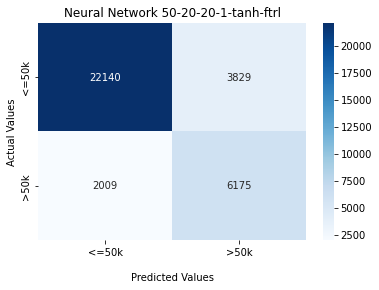

In [ ]:
nn1_report = classification_report(test_classes_val.values, y_predict_5, output_dict=True)
nn1_matrix = confusion_matrix(test_classes_val.values, y_predict_5)
nn_report =  [accuracy_result]
generate_confusion_matrix_heat_map(nn1_matrix, 'Neural Network 50-20-20-1-tanh-ftrl')

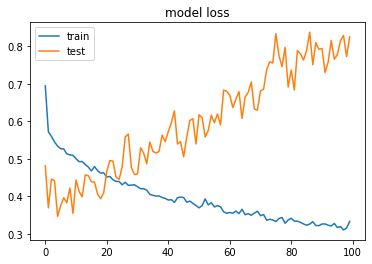

In [ ]:
plt.plot(history5.history['loss'], label='train')
plt.plot(history5.history['val_loss'], label='test')
plt.title('model loss')
plt.legend()

In [ ]:
!pip3 install ann_visualizer
!pip3 install graphviz

from ann_visualizer.visualize import ann_viz

ann_viz(model, view=True, title="5th", filename="5.nn")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Results



In [ ]:
max_nn = np.max(nn_report)

In that Neural Network (hidden layers: 128 relu, 64 relu)  configuration the Nadam optimizer produced the best results regarding prediction over test set. 

# Comparing Results

In [ ]:
results['nn'] = max_nn

models = [('Naive Bayes', results['bayes'] * 100),
          ('Decision Tree', results["decison_tree"] * 100),
          ('kNN', results["knn"] * 100),
          ('Neural Networks', results["nn"] * 100)]

df_all_models = pd.DataFrame(models, columns = ['Model', 'Accuracy'])

df_all_models

,Model,Accuracy
0,Naive Bayes,75.934764
1,Decision Tree,80.707405
2,kNN,82.677949
3,Neural Networks,82.906333


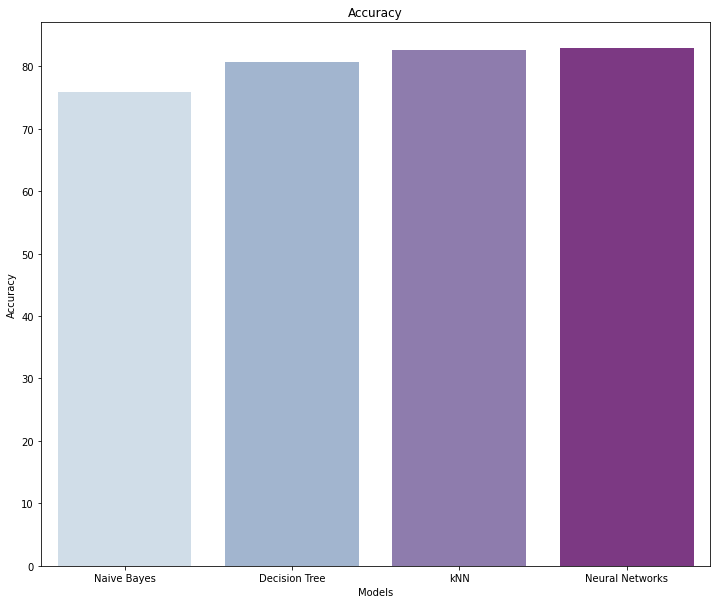

In [ ]:
plt.subplots(figsize=(12, 10))
sns.barplot(y = df_all_models['Accuracy'], x = df_all_models['Model'], palette = 'BuPu')
plt.xlabel("Models")
plt.title('Accuracy')
plt.show()

Neural Networks produced highest prediction rate, however it was bearly winning over kNN. The worst was Decision Tree. 

# Apriori 

In [ ]:
import pandas as pd
import numpy as np
train_data_a = pd.read_csv('drive/MyDrive/inf/io/census/adult.train.csv')
test_data_a = pd.read_csv('drive/MyDrive/inf/io/census/adult.test.csv')

data_a = pd.concat([train_data_a, test_data_a])

In [ ]:
data_a

,age,workclass,fnlwgt,eduction,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


Cleaning up the data as there are `<=50K` and `<=50K.` 

In [ ]:
data_a['income'] = data_a['income'].replace(' <=50K.', ' <=50K')
data_a['income'] = data_a['income'].replace(' >50K.', ' >50K')
data_a['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

Binning age into categories and countries

In [ ]:
data_a["age"] = pd.cut(data_a["age"], bins= [0,39,59,100], labels = ["Young Adults", "Middle-aged Adults", "Old Adults"])

def native_country_map(r):
  if r in [' United-States', 'Mexico']:
    return r
  return 'Other' 

data_a['native.country'] = data_a['native.country'].map(lambda x: native_country_map(x))
#data_a['native.country'] = np.where(data_a['native.country'].isin([' United-States', ' Mexico']),
 #                          data['native.country'].str.title(),
  #                         'Other')
data_a['capital.gain'] = np.where(data_a["capital.gain"].isin([0]), 0, 1)
data_a['hours.per.week'] = pd.cut(data_a["hours.per.week"], bins= [0, 39,40, 100], labels=["Less Than 40 hours", "40 hours", "More than 40 hours"])


Dropping fnlwgt and education.num

In [ ]:
data_a = data_a.drop('fnlwgt', axis=1)

In [ ]:
data_a = data_a.drop('education.num', axis=1)

Removing any records with missing data

In [ ]:
data_a = data_a.replace(' ?', np.NaN)
data_a = data_a.dropna()
data_a = pd.get_dummies(data_a)
data_a

,capital.gain,capital.loss,age_Young Adults,age_Middle-aged Adults,age_Old Adults,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,race_ White,sex_ Female,sex_ Male,hours.per.week_Less Than 40 hours,hours.per.week_40 hours,hours.per.week_More than 40 hours,native.country_ United-States,native.country_Other,income_ <=50K,income_ >50K
0,1,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1,0,0,0,1,0,0,0,0,0,1,...,1,0,1,1,0,0,1,0,1,0
2,0,0,1,0,0,0,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,1,0,1,0,1,0
4,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,0,0,1,0,0,0,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
16276,0,0,1,0,0,0,0,1,0,0,...,1,1,0,1,0,0,1,0,1,0
16278,0,0,1,0,0,0,0,1,0,0,...,1,0,1,0,0,1,1,0,1,0
16279,1,0,0,1,0,0,0,1,0,0,...,0,0,1,0,1,0,1,0,1,0


In [ ]:
data_a = data_a.reset_index(drop=True)

In [ ]:
data_a

,capital.gain,capital.loss,age_Young Adults,age_Middle-aged Adults,age_Old Adults,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,race_ White,sex_ Female,sex_ Male,hours.per.week_Less Than 40 hours,hours.per.week_40 hours,hours.per.week_More than 40 hours,native.country_ United-States,native.country_Other,income_ <=50K,income_ >50K
0,1,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1,0,0,0,1,0,0,0,0,0,1,...,1,0,1,1,0,0,1,0,1,0
2,0,0,1,0,0,0,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,1,0,1,0,1,0
4,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46028,0,0,1,0,0,0,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
46029,0,0,1,0,0,0,0,1,0,0,...,1,1,0,1,0,0,1,0,1,0
46030,0,0,1,0,0,0,0,1,0,0,...,1,0,1,0,0,1,1,0,1,0
46031,1,0,0,1,0,0,0,1,0,0,...,0,0,1,0,1,0,1,0,1,0


Binning capital.loss into any loss = 1 and no loss = 0

In [ ]:
data_a['capital.loss'] = np.where(data_a["capital.loss"].isin([0]), 0, 1)

Running apriori

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

freq_items = apriori(data_a, min_support=0.2, use_colnames=True)
freq_items.head(7)

,support,itemsets
0,0.561749,(age_Young Adults)
1,0.366411,(age_Middle-aged Adults)
2,0.736559,(workclass_ Private)
3,0.325245,(eduction_ HS-grad)
4,0.218018,(eduction_ Some-college)
5,0.465992,(marital.status_ Married-civ-spouse)
6,0.323138,(marital.status_ Never-married)


In [ ]:
freq_items.head(20)

,support,itemsets
0,0.561749,(age_Young Adults)
1,0.366411,(age_Middle-aged Adults)
2,0.736559,(workclass_ Private)
3,0.325245,(eduction_ HS-grad)
4,0.218018,(eduction_ Some-college)
5,0.465992,(marital.status_ Married-civ-spouse)
6,0.323138,(marital.status_ Never-married)
7,0.412856,(relationship_ Husband)
8,0.258858,(relationship_ Not-in-family)
9,0.856864,(race_ White)


In [ ]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(age_Young Adults),(workclass_ Private),0.561749,0.736559,0.453718,0.807688,1.096570,0.039957,1.369864
1,(workclass_ Private),(age_Young Adults),0.736559,0.561749,0.453718,0.615997,1.096570,0.039957,1.141270
2,(marital.status_ Never-married),(age_Young Adults),0.323138,0.561749,0.282406,0.873950,1.555765,0.100884,3.476790
3,(age_Young Adults),(race_ White),0.561749,0.856864,0.476919,0.848989,0.990810,-0.004424,0.947853
4,(age_Young Adults),(sex_ Male),0.561749,0.675906,0.365977,0.651495,0.963883,-0.013713,0.929953


In [ ]:
rules.head(500)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(age_Young Adults),(workclass_ Private),0.561749,0.736559,0.453718,0.807688,1.096570,0.039957,1.369864
1,(workclass_ Private),(age_Young Adults),0.736559,0.561749,0.453718,0.615997,1.096570,0.039957,1.141270
2,(marital.status_ Never-married),(age_Young Adults),0.323138,0.561749,0.282406,0.873950,1.555765,0.100884,3.476790
3,(age_Young Adults),(race_ White),0.561749,0.856864,0.476919,0.848989,0.990810,-0.004424,0.947853
4,(age_Young Adults),(sex_ Male),0.561749,0.675906,0.365977,0.651495,0.963883,-0.013713,0.929953
...,...,...,...,...,...,...,...,...,...
495,"(sex_ Male, relationship_ Husband)","(marital.status_ Married-civ-spouse, workclass...",0.412834,0.314405,0.276693,0.670227,2.131733,0.146896,2.078993
496,"(marital.status_ Married-civ-spouse, relations...","(sex_ Male, workclass_ Private)",0.412617,0.484587,0.276693,0.670580,1.383818,0.076744,1.564608
497,"(marital.status_ Married-civ-spouse, workclass...","(sex_ Male, relationship_ Husband)",0.314405,0.412834,0.276693,0.880053,2.131733,0.146896,4.895190
498,"(relationship_ Husband, workclass_ Private)","(sex_ Male, marital.status_ Married-civ-spouse)",0.276888,0.416723,0.276693,0.999294,2.397982,0.161307,826.050152


In [ ]:
rules['how_many_antecedents'] = rules['antecedents'].str.len()
rules['consequents_str'] = rules["consequents"].apply(lambda x: list(x)[0]).astype("unicode")
rules.query("how_many_antecedents > 2 and consequents_str == 'income_ <=50K'").head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,how_many_antecedents,consequents_str
372,"(age_Young Adults, marital.status_ Never-marri...",(income_ <=50K),0.238177,0.751874,0.230986,0.969810,1.289858,0.051907,8.218904,3,income_ <=50K
392,"(race_ White, age_Young Adults, workclass_ Pri...",(income_ <=50K),0.386875,0.751874,0.326983,0.845191,1.124113,0.036102,1.602786,3,income_ <=50K
402,"(sex_ Male, age_Young Adults, workclass_ Private)",(income_ <=50K),0.290857,0.751874,0.237047,0.814997,1.083955,0.018360,1.341205,3,income_ <=50K
406,"(age_Young Adults, native.country_ United-Stat...",(income_ <=50K),0.402950,0.751874,0.342906,0.850989,1.131825,0.039939,1.665158,3,income_ <=50K
422,"(race_ White, age_Young Adults, marital.status...",(income_ <=50K),0.232942,0.751874,0.224578,0.964096,1.282258,0.049435,6.910802,3,income_ <=50K
428,"(age_Young Adults, native.country_ United-Stat...",(income_ <=50K),0.253362,0.751874,0.244694,0.965789,1.284510,0.054198,7.252876,3,income_ <=50K
442,"(race_ White, age_Young Adults, sex_ Male)",(income_ <=50K),0.318815,0.751874,0.251363,0.788430,1.048620,0.011655,1.172787,3,income_ <=50K
447,"(race_ White, age_Young Adults, native.country...",(income_ <=50K),0.438316,0.751874,0.361415,0.824553,1.096664,0.031856,1.414250,3,income_ <=50K
453,"(sex_ Male, age_Young Adults, native.country_ ...",(income_ <=50K),0.323985,0.751874,0.256533,0.791806,1.053111,0.012938,1.191806,3,income_ <=50K
458,"(age_Young Adults, native.country_ United-Stat...",(income_ <=50K),0.231877,0.751874,0.200139,0.863125,1.147966,0.025797,1.812800,3,income_ <=50K


In [ ]:
rules['consequents_str'].unique()

array(['workclass_ Private', 'age_Young Adults', 'race_ White',
       'sex_ Male', 'native.country_ United-States', 'income_ <=50K',
       'marital.status_ Married-civ-spouse', 'relationship_ Husband',
       'marital.status_ Never-married'], dtype=object)

array(['workclass_ Private', 'age_Young Adults', 'race_ White',
       'sex_ Male', 'native.country_ United-States', 'income_ <=50K',
       'marital.status_ Married-civ-spouse', 'relationship_ Husband',
       'marital.status_ Never-married'], dtype=object)

Seems like there arent any rules where there are at least 2 antecedents and consequent is income above 50k. 

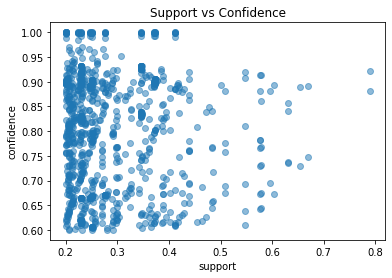

In [ ]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

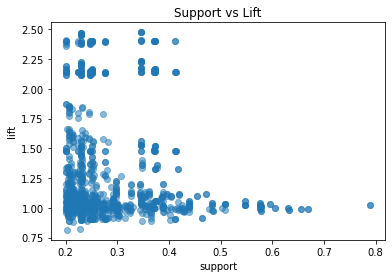

In [ ]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

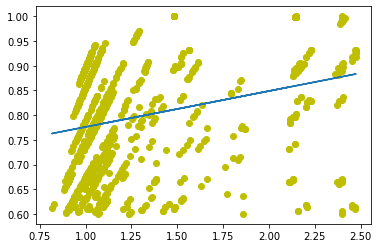

In [ ]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
fit_fn(rules['lift']))